In [ ]:
# Import Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Synthetic Dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_classes=2, random_state=42)

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(700, 20)
(300, 20)


In [ ]:
print(X)

[[-0.6693561  -1.49577819 -0.87076638 ... -1.26733697 -1.2763343
   1.01664321]
 [ 0.09337237  0.78584826  0.10575379 ... -0.12270893  0.6934308
   0.91136272]
 [-0.90579721 -0.60834121  0.29514098 ...  0.83049813 -0.73733198
  -0.5782121 ]
 ...
 [-0.20013455 -1.46108168  1.79701652 ... -1.50280171 -1.27473745
   1.60111869]
 [ 0.03935575  0.24868361 -0.47532342 ...  0.09912579  0.54269228
   1.20827474]
 [ 0.76921528  0.47076539  0.16994471 ...  0.6561162   0.64333186
  -2.02100232]]


In [ ]:
print(X_train)

[[ 1.66514238 -0.28785414  1.19517741 ...  0.06589161 -0.44336751
  -0.1620621 ]
 [-0.31607286  1.92440984 -0.10322175 ... -0.6176519   1.88477731
   0.39046485]
 [-0.18408687  0.21031463  0.07800742 ... -0.10986412 -0.01647112
   1.28279497]
 ...
 [-1.44311529 -1.39557951 -0.87960631 ... -2.23979163 -1.20240545
  -0.99144228]
 [ 0.94686146 -1.73188868  0.91339109 ...  0.06429488 -1.46065958
   1.35108895]
 [ 1.18705115  0.83332305 -0.28231204 ...  0.31912084  0.64395896
  -0.79062399]]


In [ ]:
import pandas as pd
df = pd.DataFrame(X_train)
df.head()

0         1         2         3         4         5         6   \
0  1.665142 -0.287854  1.195177  0.392456  0.268851  0.936993 -0.480214   
1 -0.316073  1.924410 -0.103222  0.926215 -0.582759 -2.967793  0.265362   
2 -0.184087  0.210315  0.078007  0.142378 -0.345104  0.355069 -1.307777   
3 -0.838176  0.113192  0.741320 -0.451641  1.209010  0.432423  0.535459   
4 -0.087148 -0.335940  0.190211  0.723070  0.115240 -1.382500 -0.243406   

         7         8         9         10        11        12        13  \
0 -0.432660  1.322703  0.727168  0.209349 -0.045044 -1.209435 -0.926163   
1  1.422748  1.203884  0.197316 -2.438817 -0.134279  1.236131  0.965397   
2  1.388665  1.665603  0.574042  0.044063 -1.835769  1.365526  0.381353   
3  2.505449  0.593539 -0.305632 -1.779875  1.064171 -0.263161  1.895149   
4  0.701256 -1.363868  1.268808  1.297940  0.646083  0.318827 -0.153809   

         14        15        16        17        18        19  
0 -0.299303  1.242827 -0.267766  0.065892 -0.443368 -0.162062  
1 -1.525438  0.088658  0.615771 -0.617652  1.884777  0.390465  
2 -0.893538 -0.630143 -0.772192 -0.109864 -0.016471  1.282795  
3 -0.739069 -1.372410 -0.600339  1.048204 -0.087880 -0.987523  
4  2.299509 -1.085174  1.140896 -2.782960  0.293270  0.014382

In [ ]:
# Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the Test Data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

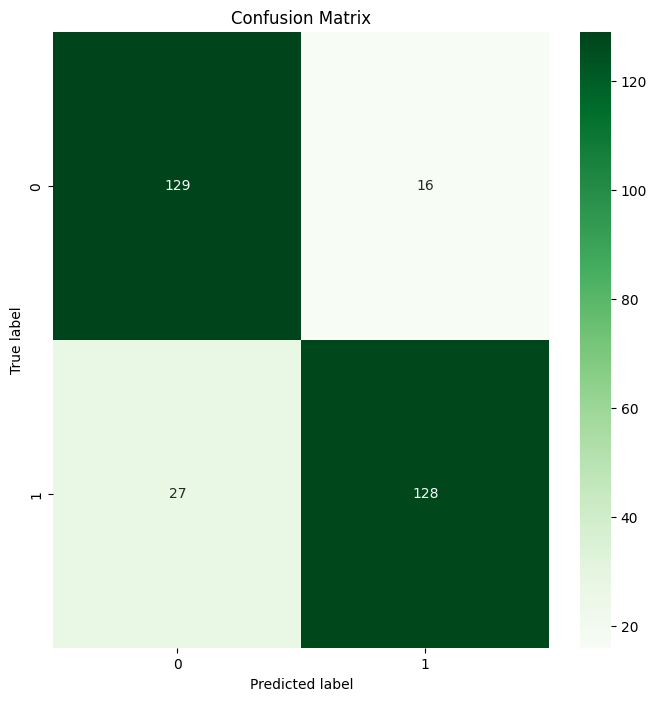

In [ ]:
# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Calculate precision, recall, and accuracy
precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')

Precision: 0.8888888888888888
Recall: 0.8258064516129032
Accuracy: 0.8566666666666667


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       145
           1       0.89      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



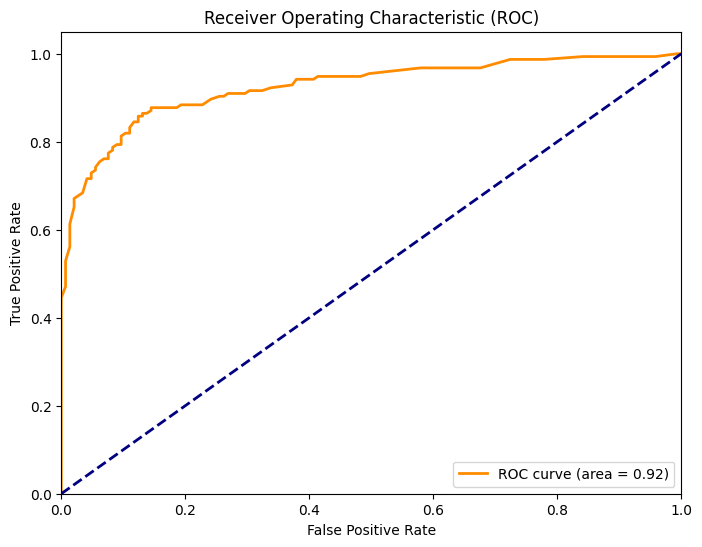

In [ ]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
print("Thresholds used:", thresholds)

Thresholds used: [ inf 1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.91 0.89 0.88 0.87 0.86
 0.85 0.84 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73 0.71 0.7
 0.69 0.67 0.66 0.65 0.64 0.61 0.59 0.58 0.56 0.54 0.49 0.48 0.46 0.44
 0.43 0.42 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.32 0.31 0.3  0.28 0.26
 0.25 0.24 0.23 0.22 0.21 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.12
 0.11 0.09 0.08 0.07 0.06 0.05 0.04 0.03 0.02 0.01 0.  ]


In [ ]:
from sklearn.metrics import mean_absolute_error

# Example data
y_true = [3.0, -0.5, 2.0, 7.0]  # True values
y_pred = [2.5, 0.0, 2.1, 7.8]   # Predicted values

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.475


In [ ]:
from sklearn.metrics import mean_squared_error

# Example data
y_true = [3.0, -0.5, 2.0, 7.0]  # True values
y_pred = [2.5, 0.0, 2.1, 7.8]   # Predicted values

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.2874999999999999


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Example data
y_true = [3.0, -0.5, 2.0, 7.0]  # True values
y_pred = [2.5, 0.0, 2.1, 7.8]   # Predicted values

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.5361902647381803
